In [2]:
## Import Dependencies
import pandas as pd
import numpy as np
import tensorflow as tf
import nltk
import matplotlib.pyplot as plt
from matplotlib import style
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [3]:
## Import train data
train_df = pd.read_csv('Genre_Classification_Dataset/train_data.txt', sep=":::", header=None, engine='python')
train_df.columns=['id','title','genre','description']
train_df.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
## Check dataframe shape
train_df.shape

(54214, 4)

In [5]:
## Import test data 
test_df = pd.read_csv('Genre_Classification_Dataset/test_data_solution.txt', sep=":::", header=None, engine='python')
test_df.columns=['id','title','genre','description']
test_df.head()

,id,title,genre,description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [6]:
## Check dataframe shape
test_df.shape

(54200, 4)

In [7]:
## Concatenate dataframes
frames = [train_df, test_df]
df = pd.concat(frames)
df.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [8]:
## Check shape of new dataframe
df.shape

(108414, 4)

In [9]:
## Check distribution of movie genres
genre_count = df['genre'].value_counts()
genre_count

genre
 drama           27225
 documentary     26192
 comedy          14893
 short           10145
 horror           4408
 thriller         3181
 action           2629
 western          2064
 reality-tv       1767
 family           1567
 adventure        1550
 music            1462
 romance          1344
 sci-fi           1293
 adult            1180
 crime            1010
 animation         996
 sport             863
 talk-show         782
 fantasy           645
 mystery           637
 musical           553
 biography         529
 history           486
 game-show         387
 news              362
 war               264
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

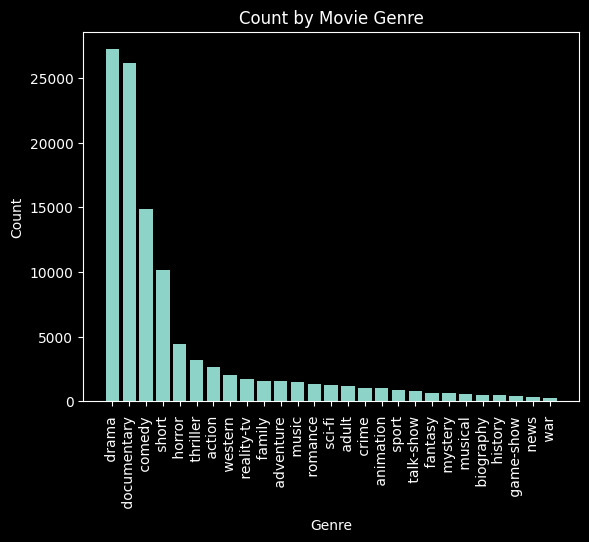

In [10]:
## Create chart that shows distribution of movie genres
plt.style.use('dark_background')
plt.bar(genre_count.index, genre_count)
plt.title('Count by Movie Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show

In [11]:
## Filter table to include the top three movie genres Drama, Documentary and Comedy
desired_genres = ['drama', 'documentary', 'comedy']
filtered_df = df[df['genre'].str.strip().isin(desired_genres)]
filtered_df.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
6,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...


In [12]:
## Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

## Define a function to clean and preprocess text
def preprocess_text(text):
    ## Convert to lowercase
    text = text.lower()
    
    ## Tokenize text
    tokens = word_tokenize(text)
    
    ## Remove stopwords and special characters
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    
    ## Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

## Apply preprocessing to the description column
filtered_df['clean_description'] = filtered_df['description'].apply(preprocess_text)

filtered_df.head()

/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_71979/1929289364.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['clean_description'] = filtered_df['description'].apply(preprocess_text)


,id,title,genre,description,clean_description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parent oscar lea...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make end meet edith twi...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers body ground zero also state ...
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,quality control consists series 16mm single ta...
6,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...,tough economic time max joey run idea discover...


In [13]:
## Change genre datatype to category 
filtered_df['genre'] = filtered_df.genre.astype('category')

## Add new column to convert categorical genre label to code
filtered_df['genre_code'] = filtered_df.genre.cat.codes

filtered_df.head()

/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_71979/3966937075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['genre'] = filtered_df.genre.astype('category')
/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_71979/3966937075.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['genre_code'] = filtered_df.genre.cat.codes


,id,title,genre,description,clean_description,genre_code
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parent oscar lea...,2
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make end meet edith twi...,2
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers body ground zero also state ...,2
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,quality control consists series 16mm single ta...,1
6,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...,tough economic time max joey run idea discover...,0


In [14]:
## Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(filtered_df['clean_description'], filtered_df['genre_code'], test_size=0.2)

In [15]:
## Set values for model training and testing
vocab_size = 200000
embedding_dim = 16
max_length = 1000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [16]:
## Tokenize and pad
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [17]:
## Create and compile model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
## Train model
num_epochs = 10

history = model.fit(train_padded, y_train, epochs=num_epochs, validation_data=(test_padded, y_test), verbose=2)

Epoch 1/10
1708/1708 - 15s - loss: 1.1697 - accuracy: 0.4057 - val_loss: 1.0538 - val_accuracy: 0.6360 - 15s/epoch - 9ms/step
Epoch 2/10
1708/1708 - 15s - loss: 0.8614 - accuracy: 0.6431 - val_loss: 0.7096 - val_accuracy: 0.6901 - 15s/epoch - 9ms/step
Epoch 3/10
1708/1708 - 15s - loss: 0.6565 - accuracy: 0.6979 - val_loss: 0.6358 - val_accuracy: 0.7063 - 15s/epoch - 9ms/step
Epoch 4/10
1708/1708 - 15s - loss: 0.5445 - accuracy: 0.7686 - val_loss: 0.5290 - val_accuracy: 0.7940 - 15s/epoch - 9ms/step
Epoch 5/10
1708/1708 - 15s - loss: 0.4576 - accuracy: 0.8197 - val_loss: 0.4970 - val_accuracy: 0.8030 - 15s/epoch - 9ms/step
Epoch 6/10
1708/1708 - 15s - loss: 0.4103 - accuracy: 0.8395 - val_loss: 0.4809 - val_accuracy: 0.8125 - 15s/epoch - 9ms/step
Epoch 7/10
1708/1708 - 16s - loss: 0.3733 - accuracy: 0.8545 - val_loss: 0.4791 - val_accuracy: 0.8164 - 16s/epoch - 9ms/step
Epoch 8/10
1708/1708 - 18s - loss: 0.3420 - accuracy: 0.8690 - val_loss: 0.4630 - val_accuracy: 0.8225 - 18s/epoch - 1

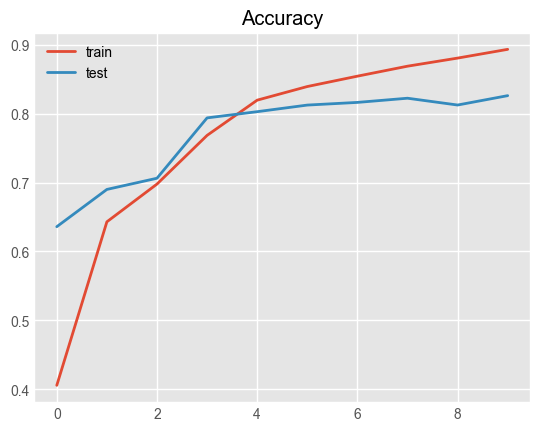

In [36]:
## Create chart to plot accuracy 
plt.style.use('ggplot')
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

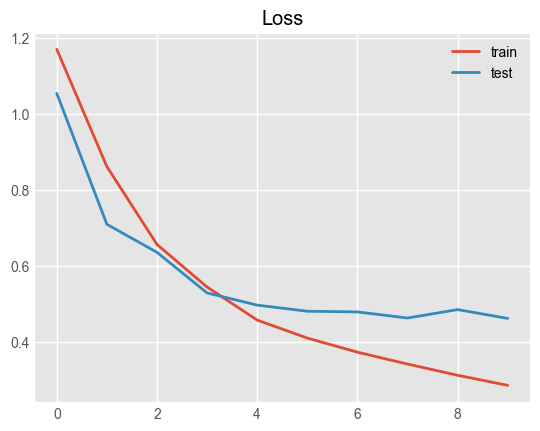

In [35]:
## Create chart to plot loss
plt.style.use('ggplot')
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [21]:
## Create predictions using the model and test dataset
predictions = model.predict(test_padded)

427/427 [==============================] - 0s 664us/step


In [22]:
## See prediction for first valye
predictions[0]

array([1.0300133e-02, 9.9912030e-04, 9.8870057e-01, 5.0939191e-09,
       5.8741909e-09, 5.5900635e-09, 5.5788898e-09, 5.1614015e-09,
       6.2493952e-09, 5.6730927e-09, 6.3377792e-09, 7.0444726e-09,
       5.6335518e-09, 5.2303166e-09, 6.0119563e-09, 5.0845226e-09,
       4.3594537e-09, 3.8480410e-09, 6.1370833e-09, 5.5718923e-09,
       4.6285127e-09, 5.0892575e-09, 6.0690559e-09, 4.9072466e-09,
       4.9254010e-09, 6.1739609e-09, 7.3677175e-09, 5.9783494e-09,
       5.2411018e-09, 5.5622724e-09, 6.3554650e-09, 5.8114713e-09,
       5.9625318e-09, 5.2077098e-09, 5.7196816e-09, 4.6515849e-09,
       6.9788353e-09, 6.4631878e-09, 7.6219777e-09, 7.0752546e-09,
       5.6512666e-09, 6.0854926e-09, 5.9206240e-09, 5.3160067e-09,
       5.5255378e-09, 4.9237006e-09, 4.5211555e-09, 7.6067286e-09,
       5.0804121e-09, 5.0653184e-09], dtype=float32)

In [23]:
## Create a results dataframe to store predictions
genre_labels = ['comedy', 'documentary', 'drama']

results_df = pd.DataFrame({'Movie Description': X_test})

## Assign genre with highest prediction to new column
results_df['Predicted Genre'] = [genre_labels[i] for i in predictions.argmax(axis=1)]

results_df.head()

,Movie Description,Predicted Genre
1875,kylor creighton never normal 16 year old boy q...,drama
22780,first installment riotous comedy show comedy u...,comedy
26181,leaving baghdad road movie follows sadik perso...,drama
7334,alice young woman joined bsh investment bank s...,drama
13109,snl alumnus jackson nealon host compilation be...,comedy


In [24]:
## Create an actuals dataframe
actual_df = pd.DataFrame({'Movie Description': X_test})
actual_df['Actual Genre'] = [genre_labels[i] for i in y_test]

actual_df.head()

,Movie Description,Actual Genre
1875,kylor creighton never normal 16 year old boy q...,drama
22780,first installment riotous comedy show comedy u...,comedy
26181,leaving baghdad road movie follows sadik perso...,drama
7334,alice young woman joined bsh investment bank s...,drama
13109,snl alumnus jackson nealon host compilation be...,comedy


In [27]:
## Create confusion matrix
cm = confusion_matrix(actual_df['Actual Genre'], results_df['Predicted Genre'])
cm_df = pd.DataFrame(
    cm, index=["Predicted Comedy", "Predicted Documentary", "Predicted Drama"],
    columns=["Actual Comedy", "Actual Documentary", "Actual Drama"])

print(cm_df)

                       Actual Comedy  Actual Documentary  Actual Drama
Predicted Comedy                2048                 189           743
Predicted Documentary            102                4752           365
Predicted Drama                  525                 450          4488


In [28]:
## Create classification report
print(classification_report(actual_df['Actual Genre'], results_df['Predicted Genre']))

              precision    recall  f1-score   support

      comedy       0.77      0.69      0.72      2980
 documentary       0.88      0.91      0.90      5219
       drama       0.80      0.82      0.81      5463

    accuracy                           0.83     13662
   macro avg       0.82      0.81      0.81     13662
weighted avg       0.82      0.83      0.82     13662

